In [1]:
# For Data Download, either:
# 1. Download individual files from mosdac.gov.in using HTTP-SSO
# 2. Download using lftp on Linux Machines or using any SFTP client

In [2]:
import glob
import satpy

import warnings
import matplotlib.pyplot as plt
import numpy as np
import random 

from mpl_toolkits.basemap import Basemap

warnings.filterwarnings("ignore")
BASE_DIR = "/vol/bitbucket/pn222/satellite/mosdac"

In [3]:
import sys
sys.path.append('../dataproc/')

from utils import get_bbox_square

In [4]:
h5_files = sorted(glob.glob(f"{BASE_DIR}/data/h5/amphan/*/*18MAY*19*.h5"))

In [5]:
idx = 0
filename = h5_files[idx]
scn = satpy.Scene(reader="insat3d_img_l1b_h5", 
                  filenames=[filename])

In [6]:
scn.load(['TIR1', 'VIS', 'latitude', 'longitude'])

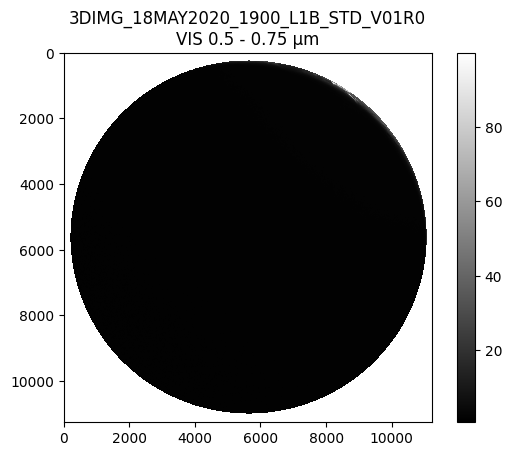

In [7]:
plt.figure()
title = filename.split('/')[-1][:-4]
plt.title(f"{title}\nVIS 0.5 - 0.75 µm")
plt.imshow(scn['VIS'], cmap="gray")
plt.colorbar() ;

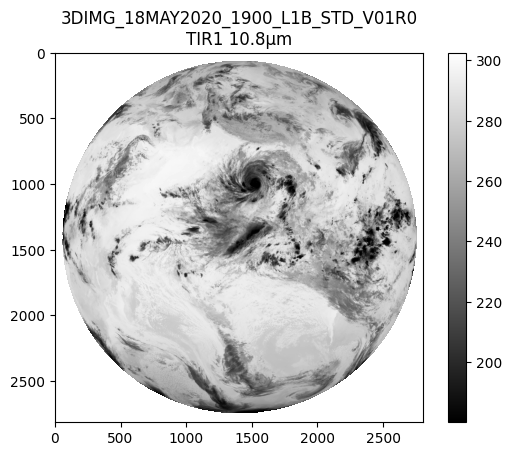

In [8]:
plt.figure()
plt.title(f"{title}\nTIR1 10.8µm")
plt.imshow(scn['TIR1'], cmap="gray")
plt.colorbar() ;

In [9]:
map_x0, map_y0 = 78.662109, 20.344627
hs_length = 20

map_bounds = get_bbox_square(map_x0, map_y0, hs_length)
mc_scn = scn.crop(ll_bbox=map_bounds).resample(resampler='native')
ir108_scn = mc_scn['TIR1']

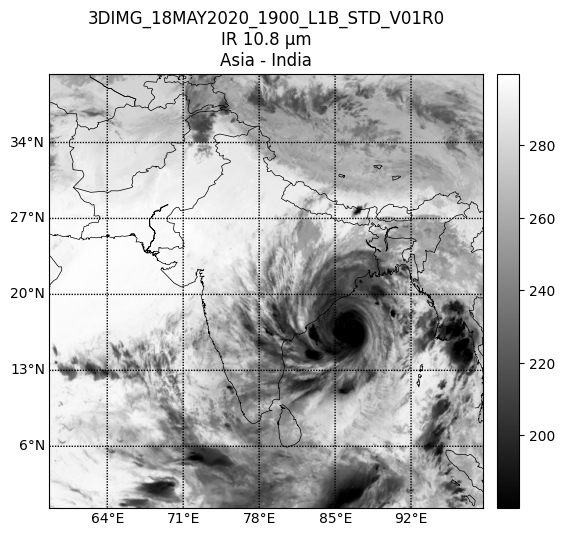

In [10]:
extent = ir108_scn.attrs['area'].get_lonlats()

m = Basemap(llcrnrlon=map_bounds[0], llcrnrlat=map_bounds[1],
            urcrnrlon=map_bounds[2], urcrnrlat=map_bounds[3],
            projection='cyl', resolution='l')

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

kwargs = {
    "linewidth": 0.5,
    "color": "k",
}

m.drawcoastlines(**kwargs)
m.drawcountries(**kwargs)
m.drawstates(**kwargs)
img = m.imshow(ir108_scn.data, origin='upper', extent=map_bounds, cmap="gray")

m.drawparallels(range(int(map_bounds[1])-1, int(map_bounds[3]), 7), labels=[1, 0, 0, 0], fontsize=10)
m.drawmeridians(range(int(map_bounds[0])-1, int(map_bounds[2]), 7), labels=[0, 0, 0, 1], fontsize=10)

cbar = plt.colorbar(img)
ax_pos = ax.get_position()
cbar.ax.set_position([ax_pos.x0 + ax_pos.width + 0.02, ax_pos.y0, 0.1, ax_pos.height])

plt.title(f"{title}\nIR 10.8 µm\nAsia - India")
plt.savefig(f'./pngs/insat3d_amphan_18MAY2020_1900.png', bbox_inches='tight', pad_inches=0)

In [11]:
y_north = np.nanmax(scn["latitude"].values)
y_south = np.nanmin(scn["latitude"].values)
x_east  = np.nanmax(scn["longitude"].values)
x_west  = np.nanmin(scn["longitude"].values)

print("INSAT_WBOX:", (x_west, y_south, x_east, y_north))

INSAT_WBOX: (0.7790000370005146, -81.22400385793298, 163.220007752534, 81.22400385793298)
